<a href="https://colab.research.google.com/github/Vibertexs/Tensorflow-Projects/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-11-25 17:24:55--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   621KB/s    in 0.8s    

2020-11-25 17:24:57 (621 KB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [ ]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7241 unique tokens.


In [ ]:
df.head()
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'is': 8,
 'in': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'at': 26,
 'or': 27,
 'be': 28,
 'will': 29,
 'do': 30,
 'can': 31,
 'just': 32,
 'with': 33,
 "i'm": 34,
 'if': 35,
 'ur': 36,
 'get': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 '4': 41,
 'lt': 42,
 'gt': 43,
 'when': 44,
 'ok': 45,
 'out': 46,
 'up': 47,
 'from': 48,
 'know': 49,
 'what': 50,
 'how': 51,
 'free': 52,
 'go': 53,
 'good': 54,
 'all': 55,
 'was': 56,
 'like': 57,
 'got': 58,
 'its': 59,
 'then': 60,
 'come': 61,
 'day': 62,
 'only': 63,
 'am': 64,
 'time': 65,
 'love': 66,
 'he': 67,
 'send': 68,
 'there': 69,
 'want': 70,
 'text': 71,
 'txt': 72,
 'one': 73,
 'as': 74,
 'about': 75,
 'home': 76,
 "i'll": 77,
 'going': 78,
 'r': 79,
 'need': 80,
 'lor': 81,
 'by': 82,
 'sorry': 83,
 'stop': 84,
 'ba

In [ ]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [ ]:
D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D) (i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x) #this is good for long term
x=Dense(1, activation='sigmoid')(x)

model = Model(i,x)


In [ ]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 16ms/step - loss: 0.4489 - accuracy: 0.8658 - val_loss: 0.3359 - val_accuracy: 0.8662
Epoch 2/10
117/117 [==============================] - 2s 13ms/step - loss: 0.2525 - accuracy: 0.8658 - val_loss: 0.2064 - val_accuracy: 0.8662
Epoch 3/10
117/117 [==============================] - 2s 13ms/step - loss: 0.1692 - accuracy: 0.9445 - val_loss: 0.1510 - val_accuracy: 0.9821
Epoch 4/10
117/117 [==============================] - 2s 13ms/step - loss: 0.1143 - accuracy: 0.9920 - val_loss: 0.1102 - val_accuracy: 0.9831
Epoch 5/10
117/117 [==============================] - 2s 13ms/step - loss: 0.0750 - accuracy: 0.9946 - val_loss: 0.0837 - val_accuracy: 0.9848
Epoch 6/10
117/117 [==============================] - 2s 13ms/step - loss: 0.0519 - accuracy: 0.9962 - val_loss: 0.0661 - val_accuracy: 0.9886
Epoch 7/10
117/117 [==============================] - 1s 13ms/step - loss: 0.0375 - accuracy: 0.9976 - val_loss: 0.0591 - va

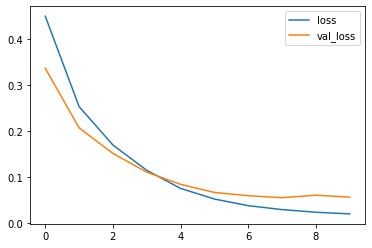

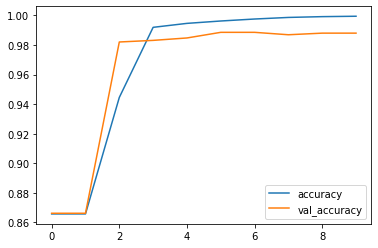

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()